## Python Analysis

After analyzing the cleaned text using Python, we also explored the following research questions.

First, there is the import of the necessary Python runtime libraries.

In [1]:
# natural language processing and text analysis with nltk
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# using os to process cleaned txt files
import os

# using string for faster processing of strings.
import string

# using plt and pandas to work with charts and tables
import matplotlib.pyplot as plt
import pandas as pd

# counter required to calculate word frequency
from collections import Counter

In the second step, all the txt files in our corpus are opened and stored in contents_list for use.

In [2]:
# create a function that reads the contents of all txt files and saves them in a list.
def read_all_txt_files(folder_path):
    files = os.listdir(folder_path)
    txt_contents = []
    for file_name in files:
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                txt_contents.append(content)

    return txt_contents

folder_path = "C:/Users/70794/manually" # customized folder paths
contents_list = read_all_txt_files(folder_path)
print(len(contents_list)) # Test that the number of values in the list matches the number of txt files.

72


In the previous cleanup, punctuations and case were not processed considering the preservation of tone and sentiment, so here we will further process the text for word frequency calculation.

In [3]:
# combined all the values in the list to a string
all_text = " ".join(contents_list)

# remove punctuation
all_text = all_text.translate(str.maketrans("", "", string.punctuation))

# transfer to lowercase
all_text = all_text.lower()


Additionally, we will create a dictionary with the key being the year corresponding to the presentation and the value being the content of the presentation. This will help in the analysis of the chart.

In [4]:
first_year = 1952
year_speeches = {}
for text in contents_list:
    year_speeches[first_year] = text
    first_year += 1

And finally a stoplist created based on Voyant's stoplist.Compared to NLTK's stopwords, this stoplist covers a more comprehensive range of content and is better suited to our corpus.All of the following word frequency analyses will be based on this stoplist.

In [5]:
stoplist = [
        "!", "$", "%", "&", ",", "-", ".", "0", "1", "10", "100", "11", "12", "13", "14", "15", "16", "17", "18", "19", 
        "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2", "20", "2000", "2001", "2002", 
        "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", 
        "2017", "2018", "2019", "2020", "21", "22", "23", "24", "25", "26", "27", "28", "29", "3", "30", "31", "32", "33", 
        "34", "35", "36", "37", "38", "39", "4", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "5", "50", 
        "51", "52", "53", "54", "55", "56", "57", "58", "59", "6", "60", "61", "62", "63", "64", "65", "66", "67", "68", 
        "69", "7", "70", "71", "72", "73", "74", "75", "76", "77", "78", "8", "80", "81", "82", "83", "84", "85", "86", 
        "87", "88", "89", "9", "90", "91", "92", "93", "94", "95", "96", "97", "98", "99", ":", ";", "<", ">", "@", "\(", 
        "\)", "\*", "\+", "\?", "\[", "\]", "\^", "\{", "\}", "a", "about", "above", "across", "after", "afterwards", "again", 
        "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", 
        "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", 
        "b", "back", "be", "because", "been", "before", "beforehand", "being", "beside", "besides", "between", "both", "bottom", "but", 
        "by", "c", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "d", "de", "did", "didn't", "do", "does", "doesn't", 
        "don't", "done", "down", "due", "during", "e", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "enough", "etc", 
        "even", "ever", "every", "everyone", "everything", "everywhere", "except", "f", "few", "fifteen", "fify", "fill", "find", "fire", 
        "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "g", "get", "give", "go", 
        "h", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", 
        "himself", "his", "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed", "into", "is", "it", "its", "itself", "j", "k", 
        "keep", "l", "last", "latter", "latterly", "least", "less", "ltd", "m", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", 
        "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "n", "name", "namely", "neither", "never", "nevertheless", 
        "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "o", "of", "off", "often", "on", "once", "one", 
        "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "p", "part", "per", "perhaps", 
        "please", "put", "q", "r", "rather", "re", "s", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", 
        "since", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", 
        "t", "take", "ten", "than", "that", "the", "thee", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", 
        "therein", "thereupon", "these", "they", "thing", "third", "this", "those","thou", "though", "three", "through", "throughout", "thru", "thus", "thy", "to", "together", 
    "too", "toward", "towards", "twelve", "twenty", "two", "u", "un", "under", "until", "up", 
    "upon", "us", "v", "very", "via", "w", "was", "we", "well", "were", "what", "whatever", 
    "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", 
    "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", 
    "whom", "whose", "why", "will", "with", "within", "without", "would", "x", "y", "yet", "you", 
    "your", "yours", "yourself", "yourselves", "z", "|"
]


### Research Question 1:
Catsiapis mentions ‘family’, ’Commonwealth’ and ’Christmas’ as overarching themes in her close reading of the Queen’s Christmas speeches.
Can we identify the same themes with computational methods?


First we will calculate the word frequency of the three words.

In [6]:

# creat the target words list
target_words = ["family", "commonwealth", "christmas"]

# use Counter to calculate word frequencies
word_frequencies = Counter(all_text.split())

# print the frequency of all the three words and they appear, on average, how many times in each speech
for word in target_words:
    print(f"{word}: {word_frequencies[word]}")
    print(f"{word} average: {word_frequencies[word] / 72}")


family: 129
family average: 1.7916666666666667
commonwealth: 185
commonwealth average: 2.5694444444444446
christmas: 327
christmas average: 4.541666666666667


When we extract the top ten high-frequency words from all the documents, we can also notice that family is not mentioned as much as some other words.

In [7]:
# filtered the stoplist
filtered_words = [word for word in all_text.split() if word not in stoplist]

# calculate the frequencies
word_frequencies = Counter(filtered_words)
top_ten_words = word_frequencies.most_common(10)

print("Top 10 high-frequency words:")
for word, frequency in top_ten_words:
    print(f"{word}: {frequency}")

Top 10 high-frequency words:
christmas: 327
people: 240
year: 224
world: 215
commonwealth: 185
time: 142
family: 129
great: 123
new: 110
years: 107


The word family only appeared less than twice per document on average. And it's only seventh in frequency. We will discuss this later.

First we will take a brief look at the word Christmas. Considering our theme is the Queen's Christmas Speech, Christmas will of course be a major theme. We will use lists and charts to make observations.

In [8]:

# Counting the number of occurrences of Christmas in each speech
christmas_counts_data = {
    'Year': [],
    'Christmas Counts': []
}

for year, content in year_speeches.items():
    christmas_count = content.lower().count('christmas')
    christmas_counts_data['Year'].append(year)
    christmas_counts_data['Christmas Counts'].append(christmas_count)

df_christmas_counts = pd.DataFrame(christmas_counts_data)
df_christmas_counts

,Year,Christmas Counts
0,1952,6
1,1953,5
2,1954,5
3,1955,4
4,1956,6
...,...,...
67,2019,4
68,2020,4
69,2021,10
70,2022,3


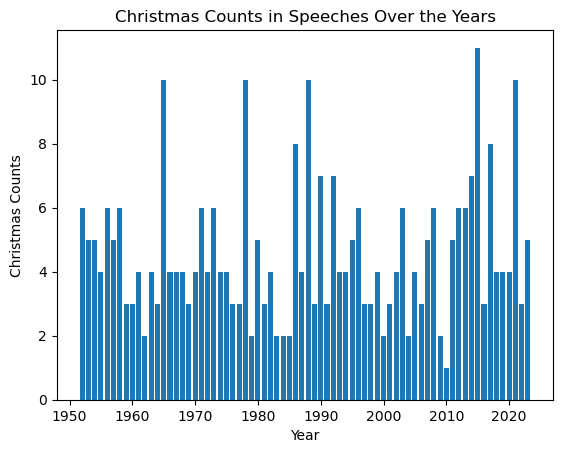

In [9]:
# Plot bar graphs for better visualization
plt.bar(df_christmas_counts['Year'], df_christmas_counts['Christmas Counts'])
plt.xlabel('Year')
plt.ylabel('Christmas Counts')
plt.title('Christmas Counts in Speeches Over the Years')
plt.show()

We will discuss the theme of family further next.
Though the word ‘family’ appears slightly less frequently in the speeches, an extraction of word frequencies reveals that not every year's Christmas speech includes this word. 

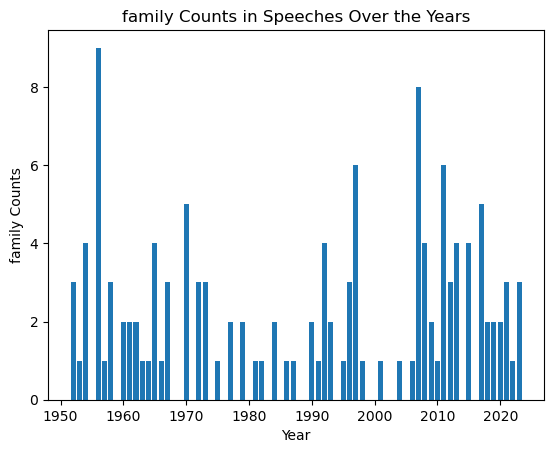

In [10]:

# Counting the number of occurrences of 'family' in each speech
christmas_counts_data = {
    'Year': [],
    'family Counts': []
}

for year, content in year_speeches.items():
    christmas_count = content.lower().count('family')
    christmas_counts_data['Year'].append(year)
    christmas_counts_data['family Counts'].append(christmas_count)

df_christmas_counts = pd.DataFrame(christmas_counts_data)
df_christmas_counts

# Plot bar graphs for better visualization
plt.bar(df_christmas_counts['Year'], df_christmas_counts['family Counts'])
plt.xlabel('Year')
plt.ylabel('family Counts')
plt.title('family Counts in Speeches Over the Years')
plt.show()

But we have expanded the word family to include not just families, but families, childern, grandchildren, and so on. This number is going to get larger.

Before we do that, we're going to check our list of words with the word "grand" in addition to the obvious ones like husband, son, daughter.

In [11]:
# match every word include "grand".
target_sequence = "grand"
matching_words_dict = {year: [word.strip(".,?!():;-") for word in nltk.word_tokenize(content) if target_sequence in word.lower()] for year, content in year_speeches.items()}

# ensure every word is distinct in the list
all_matching_words = set()
for content in year_speeches.values():
    matching_words = [word.strip(".,?!():;-").lower() for word in nltk.word_tokenize(content) if target_sequence in word.lower()]
    all_matching_words.update(matching_words)

all_matching_words_list = list(all_matching_words)
print(all_matching_words_list)

['grandparents', 'grandparent', 'grand-daughter', 'grandmother', 'great-grandfather', 'grandchildren', 'grandchild', 'grand', 'grandfather']


This way we make sure that we don't miss words like great-grandfather and we don't miscalculate the word "grand" itself.
Next we can create a list of words related to family and count them.

In [12]:

# build a word list for words which are related to family
target_words = ["family", "families", "husband","son","daughter","child","children","grandmother","grandfather","grandchild","grandchildren","grand-daughter","grandparents","great-grandfather"]

# calculate the frequecies
word_frequencies = Counter(all_text.lower().split())  

for word in target_words:
    frequency = word_frequencies[word.lower()]  
    print(f"{word}: {frequency}")
total_frequency = sum(word_frequencies[word.lower()] for word in target_words)
print(f"Total frequency of target words: {total_frequency}")


family: 129
families: 54
husband: 19
son: 12
daughter: 7
child: 25
children: 89
grandmother: 3
grandfather: 10
grandchild: 3
grandchildren: 18
grand-daughter: 0
grandparents: 5
great-grandfather: 0
Total frequency of target words: 374


Now we can see that the frequency of family-related words has even surpassed the frequency of Christmas. We can certainly say that "family" was also an important theme in the Queen's Christmas speech.

For the analysis of the third theme word, "commowealth", we will introduce the second research question.

### Research Question 2:
When did the term 'empire' change into 'commonwealth'? And what terms are the most associated with both?


When we talk about commonwelath, we can't avoid this: the progression from the Empire of Great Britain to the Commonwealth.
As we all know, the issuance of the Singapore Declaration in 1971 signified the shift of the Commonwealth from the colonial system of the past to a more egalitarian and cooperative international organization. The word ‘empire’ occurs very infrequently in the Queen's speeches as it encompasses a more colonial meaning. 

In [18]:
target_word = ["empire"]

# calculate the frequencies
word_frequencies = Counter(all_text.split())

for word in target_word:
    print(f"{word}: {word_frequencies[word]}")


empire: 8


By analyzing the Queen's speeches, we can see that the word ‘empire’ undergoes a gradual replacement by the concept of the Commonwealth after the 1950s.
In addition, we will also include the word "world" as a reference in the comparative analysis, in order to better observe the impact of world politics on the Queen's Speech.

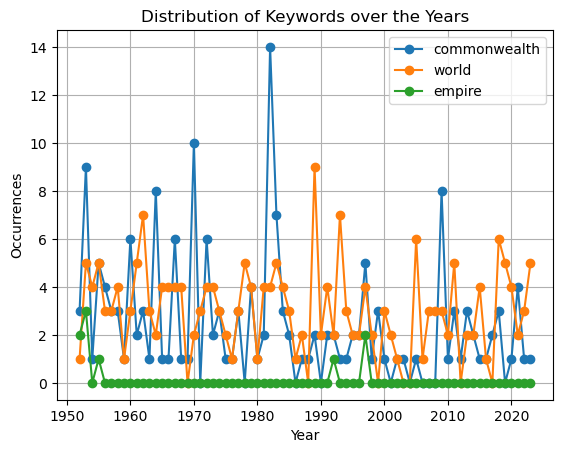

In [19]:

# build target word list
target_words = ["commonwealth", "world", "empire"]

occurrences_count = {year: {word: 0 for word in target_words} for year in year_speeches.keys()}

# calculate frequencies
for year, content in year_speeches.items():
    sentences = nltk.sent_tokenize(content)
    for sentence in sentences:
        for word in target_words:
            if word.lower() in sentence.lower():
                occurrences_count[year][word] += 1

years = list(occurrences_count.keys())

for word in target_words:
    occurrences = [occurrences_count[year][word] for year in years]
    plt.plot(years, occurrences, marker='o', label=word)

plt.title('Distribution of Keywords over the Years')
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.legend()
plt.grid(True)
plt.show()


In some special years, the Queen still mentions "empire" several times. In order to analyze this further, we will extract the relevant sentences in order to confirm the context.

In [20]:
def extract_sentences_with_word(content, target_word):
    sentences = content.split('.')  # split sentences with "."
    occurrences = []

    for sentence in sentences:
        if target_word.lower() in sentence.lower():
            occurrences.append(sentence.strip())

    return occurrences

target_word = "empire"

# extract every sentence include "empire"
occurrences_dict = {}

for year, content in year_speeches.items():
    occurrences = extract_sentences_with_word(content, target_word)
    
    if occurrences:
        occurrences_dict[year] = occurrences

for year, occurrences in occurrences_dict.items():
    print(f"\nYear: {year}")
    for occurrence in occurrences:
        print(f"Sentence: {occurrence}")



Year: 1952
Sentence: We belong, all of us, to the British Commonwealth and Empire, that immense union of nations, with their homes set in all the four corners of the earth
Sentence: I shall do so in the presence of a great congregation, drawn from every part of the Commonwealth and Empire, while millions outside Westminster Abbey will hear the promises and the prayers being offered up within its walls, and see much of the ancient ceremony in which Kings and Queens before me have taken part through century upon century

Year: 1953
Sentence: But what is really important to me is that I set out on this journey in order to see as much as possible of the people and countries of the Commonwealth and Empire, to learn at first hand something of their triumphs and difficulties and something of their hopes and fears
Sentence: From the Empire of which they built the frame, there has arisen a world-wide fellowship of nations of a type never seen before
Sentence: Thus formed, the Commonwealth bear

The Queen used the word ‘empire’ six times between 1952-1955. Four of these were references to ‘commonwealth and empire’. Considering the colonial overtones embedded in the term ‘empire’, the comparison of the ‘Commonwealth’ to ‘empire’ illustrates, on the one hand, the fading of colonialism and, on the other hand, the continued existence of the concept of empire in equal measure.


Since then, the Queen had mentioned the word ‘empire’ again in 1992, in her fortieth Christmas speech. As a result of looking back over the last forty years, and the times of her father and grandfather, she inevitably used the word ‘empire’. She described the process she had experienced in moving from ‘empire’ to the ‘Commonwealth’. Clearly this is a story of old concepts being replaced by new ones.
And in 1997, she again used the word ‘empire’ twice. It contains a stronger sense of the past. Her use of the term ‘old empire’ may be related to the fact that in 1997, Hong Kong, the last British colony, was returned to China. Since then all the colonies of the old empire have ceased to exist. It was also the last time the word ‘empire’ was used in the Queen's speeches.


In order to further validate the relationship between "empire" and "commonwealth", we will identify the themes of the presentations for these five years. For this we will extract the high frequency words of the speeches of these five years.

In [21]:

def process_text(text):
    translation_table = str.maketrans("", "", ".,?!():;-")
    text = text.translate(translation_table).lower()
    words = [word for word in nltk.word_tokenize(text) if word not in stoplist]
    return words


# build the list of the years we would like to work on
interest_years = [1952, 1953, 1955, 1992, 1997]

top_words_dict = {}

for year, content in year_speeches.items():
    if year in interest_years:
        words = process_text(content)
        word_counter = Counter(words)

        for stopword in stoplist:
            if stopword in word_counter:
                del word_counter[stopword]

        top_words = word_counter.most_common(10)
        top_words_dict[year] = top_words

for year, top_words in top_words_dict.items():
    print(f"\nYear: {year}")
    for word, frequency in top_words:
        print(f"{word}: {frequency}")


Year: 1952
christmas: 6
shall: 6
day: 4
family: 3
homes: 3
families: 3
spirit: 3
commonwealth: 3
earth: 3
strength: 3

Year: 1953
commonwealth: 9
new: 8
great: 6
christmas: 5
zealand: 5
nations: 5
world: 4
time: 4
like: 4
year: 3

Year: 1955
year: 6
new: 6
world: 5
adventure: 5
power: 5
'': 5
commonwealth: 5
christmas: 4
nations: 4
just: 3

Year: 1992
christmas: 7
year: 6
family: 4
years: 4
help: 4
's: 4
peace: 3
make: 3
given: 3
bring: 3

Year: 1997
joy: 6
family: 6
people: 5
commonwealth: 5
prince: 4
happy: 4
world: 4
service: 4
day: 4
old: 4


With the exception of the 40th anniversary speech in 1992, which was quite special, we can see that "commonwealth" has been an important theme in every year's speech. Words such as "nation" and "world" have also been mentioned throughout the years. In the 1997 speech, in view of the importance of Hong Kong as the last colony, the word "old" appeared four times, which is also worth noting.

Although in the Queen's speeches, ‘empire’ always appears in conjunction with words like ‘past’ and ‘old’, we can still see traces of the gradual replacement of the word ‘empire’ by ‘Commonwealth’ in the changes to the decades.

Aside from the turnover of these two terms, are there any other trends that have changed in speeches over the years?
To this we will ask a third question: whether the readability of the speech has changed over the entire 72 Christmas speeches.


### Research Question 3:
What does readability analysis tell us?

In the module of readability analysis, we use the Coleman Liau index.
First we start by analyzing the readability of the 72 txt files.

In [22]:

def calculate_coleman_liau_index(text):
    translation_table = str.maketrans("", "", ".,?!():;-")
    text = text.translate(translation_table)

    sentences = nltk.sent_tokenize(text)

    char_count = sum(len(word) for word in text if word.isalnum())
    word_count = len(nltk.word_tokenize(text))
    sentence_count = len(sentences)

    # calculate the Coleman–Liau index
    index = 0.0588 * (char_count / word_count * 100) - 0.296 * (sentence_count / word_count * 100) - 15.8

    return index


# Calculate the Coleman-Liau index for each text segment and form a DataFrame
index_data = {
    'Year': [],
    'Coleman–Liau Index': []
}

for year, content in year_speeches.items():
    index = calculate_coleman_liau_index(content)
    index_data['Year'].append(year)
    index_data['Coleman–Liau Index'].append(index)

df = pd.DataFrame(index_data)

df

,Year,Coleman–Liau Index
0,1952,8.892312
1,1953,10.443697
2,1954,10.719499
3,1955,9.888468
4,1956,9.419773
...,...,...
67,2019,11.040259
68,2020,9.987812
69,2021,10.089888
70,2022,9.957452


Next we will extract the hardest and easiest speeches to read.

In [23]:

most_readable = df.nlargest(10, 'Coleman–Liau Index')
least_readable = df.nsmallest(10, 'Coleman–Liau Index')

print("Easiest: ")
print(most_readable)

print("\nHardest: ")
print(least_readable)

Easiest: 
    Year  Coleman–Liau Index
57  2009           13.124692
31  1983           12.260957
30  1982           12.101578
27  1979           11.870853
24  1976           11.844044
16  1968           11.736063
15  1967           11.693263
20  1972           11.616818
8   1960           11.597417
58  2010           11.570799

Hardest: 
    Year  Coleman–Liau Index
19  1971            8.264812
7   1959            8.505512
0   1952            8.892312
26  1978            8.914856
71  2023            9.048280
34  1986            9.107195
17  1969            9.127757
5   1957            9.224928
40  1992            9.238372
63  2015            9.317997


In addition to this, we plotted line graphs of the change in readability for each year, and included the most readable and most difficult to read scatter plots to visualize the results of our analysis.

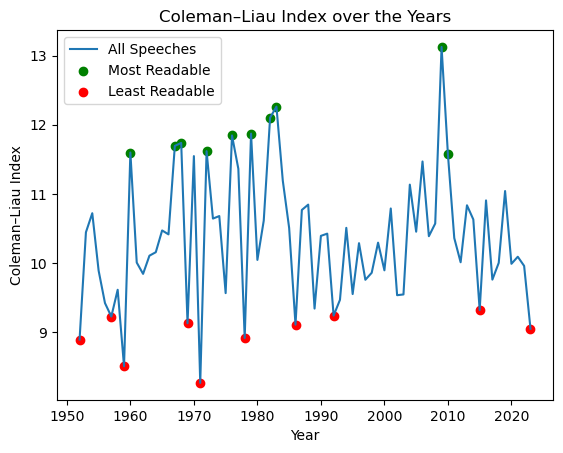

In [24]:

plt.plot(df['Year'], df['Coleman–Liau Index'], label='All Speeches')
plt.scatter(most_readable['Year'], most_readable['Coleman–Liau Index'], color='green', label='Most Readable')
plt.scatter(least_readable['Year'], least_readable['Coleman–Liau Index'], color='red', label='Least Readable')

plt.title('Coleman–Liau Index over the Years')
plt.xlabel('Year')
plt.ylabel('Coleman–Liau Index')
plt.legend()

plt.show()

Although the most readable speeches are more evenly distributed, the most difficult to read speeches are clearly concentrated mainly before 1995 and less volatile these years. And of the top ten hardest to read speeches, only two speeches are after 1995 (which also includes Charles IV's speech in 2023).
So we can see that the royal family has really made an effort in recent years to make itself more accessible to the people, this trend in readability illustrates this.